In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as md
import matplotlib.ticker as ticker
from scipy import stats
import numpy as np

In [3]:
Dots = pd.read_csv('Data_Level4_UMDOTS_CampusTrafficCount.csv')
Dots['Date'] = Dots['time'].str[:10]
Dots['Date'] = pd.to_datetime(Dots['Date'])
Dots['StartTime'] = Dots['time'].str[11:19]
Dots['StartTime'] = pd.to_datetime(Dots['StartTime'])
Dots['StartTime'] = Dots['StartTime'].apply(lambda x: x.time())
Dots['time'] = pd.to_datetime(Dots['time'].str[:10]+' '+Dots['time'].str[11:19])

In [4]:
def loca_into_five(a):
    if 'Gate' in a:
        return "Baltimore Avenue & Regents Drive (South Gate)"
    elif ('Campus' in a) & ('Paint' in a):
        return "Campus Drive & Paint Branch Drive"
    elif ('Regents' in a) & ('Stadium' in a):
        return "Stadium Drive & Regents Drive"
    else:
        return a

In [5]:
def temperature(a):
    if a.date()==datetime.date(2019,10,29):
        return 58.3
    elif a.date()==datetime.date(2019,10,30):
        return 57.1
    elif a.date()==datetime.date(2019,10,31):
        return 57.3
    elif a.date()==datetime.date(2019,11,1):
        return 43.9
    elif a.date()==datetime.date(2019,11,2):
        return 38.9
    elif a.date()==datetime.date(2019,11,3):
        return 40.0
    elif a.date()==datetime.date(2019,11,4):
        return 44.1
    elif a.date()==datetime.date(2019,11,5):
        return 45.9
    elif a.date()==datetime.date(2019,11,6):
        return 44.3
    elif a.date()==datetime.date(2019,11,7):
        return 49.7
    elif a.date()==datetime.date(2019,11,8):
        return 37.4
    elif a.date()==datetime.date(2019,11,9):
        return 32.6
    elif a.date()==datetime.date(2019,11,10):
        return 41.8
    elif a.date()==datetime.date(2019,11,11):
        return 50.2
    elif a.date()==datetime.date(2019,10,28):
        return 57.4


In [6]:
def class_peaks(a):
    #print (a.values[1])
    return np.floor_divide(a[0], a[1])
        

In [7]:
def calculate_center(a):
    return a[0]*a[1]+a[1]/2

In [8]:
def rounded_time(df):
    
    df_refined=df.copy()
    df_refined['dif']=df_refined['weekday'].apply(lambda x: 1 if x in [1,3,5,6,7] else 1.5)
    df_refined['idx']=df_refined[['hour','dif']].apply(class_peaks,axis=1)
    df_refined=df_refined.drop(columns=["hour"])
    df_output=df_refined.groupby(['Date','idx',"temp"],as_index=False).mean()
    df_output['center_time']=df_output[['idx','dif']].apply(calculate_center, axis=1)
    
    return df_output

In [9]:
Dots['location_5'] = Dots['location'].apply(loca_into_five)
Dots['weekday'] = Dots['Date'].apply(lambda x: x.weekday()+1)
import os
if not os.path.exists("figs"):
    os.makedirs("figs")

Dots_sensor_1=Dots[Dots['location_5']=='Campus Drive & Paint Branch Drive']
Dots_sensor_other=Dots[Dots['location_5']!='Campus Drive & Paint Branch Drive']
Dots_sensor_2=Dots[Dots['location_5']=='Stadium Drive & Regents Drive']
Dots_sensor_other=Dots_sensor_other[Dots_sensor_other['location_5']!='Stadium Drive & Regents Drive']
Dots_sensor_3=Dots[Dots['location_5']=='Baltimore Avenue & Regents Drive (South Gate)']
Dots_sensor_other=Dots_sensor_other[Dots_sensor_other['location_5']!='Baltimore Avenue & Regents Drive (South Gate)']

Dots_sensor_1=Dots_sensor_1.groupby(['time','location_5','Date','StartTime','weekday'],as_index=False).mean()
Dots_sensor_2=Dots_sensor_2.groupby(['time','location_5','Date','StartTime','weekday'],as_index=False).mean()
Dots_sensor_3=Dots_sensor_3.groupby(['time','location_5','Date','StartTime','weekday'],as_index=False).mean()
Dots_sensor_other=Dots_sensor_other.drop(columns=['location'])

for i in ['pedestrians','bicyclists','cars','buses','trucks']:
    Dots_sensor_2[i]=Dots_sensor_2[i]*2

Dots_mod=Dots_sensor_1.append([Dots_sensor_2,Dots_sensor_3,Dots_sensor_other],ignore_index=False)

D:\Users\mrzcl\Anaconda3\envs\homework1\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


R2= 0.6167518787730363


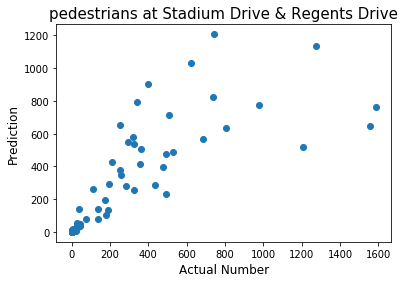

R2= 0.8164063233325829


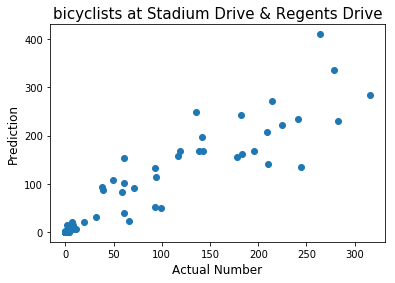

R2= 0.9214625847115685


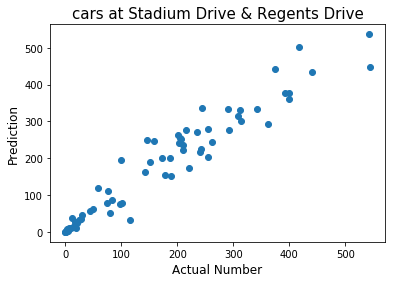

R2= 0.787546051763188


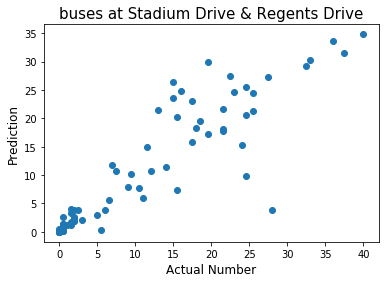

R2= 0.8526456264205786


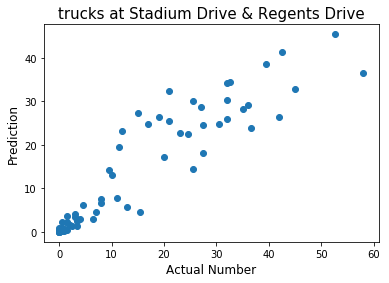

R2= 0.12451579581991823


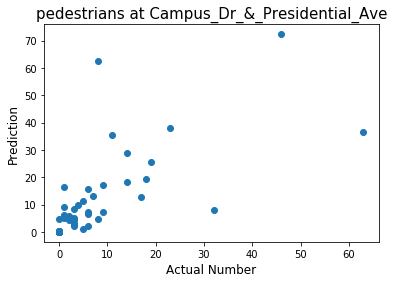

R2= 0.06251040312299583


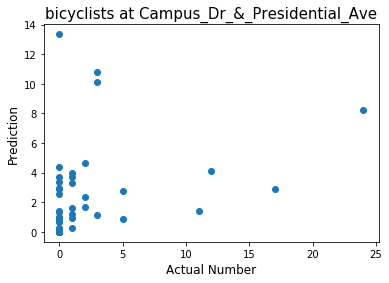

R2= 0.8724516244486262


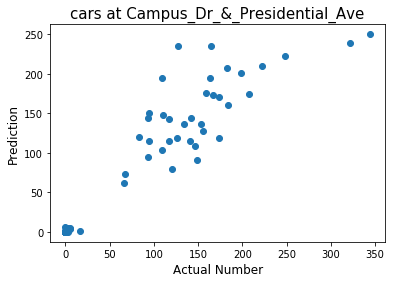

R2= 0.4192666366841713


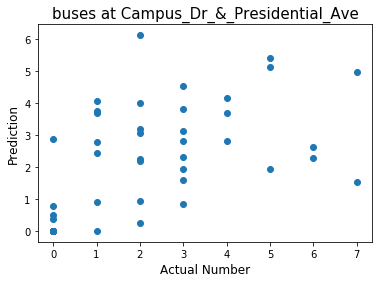

R2= 0.7005851695671592


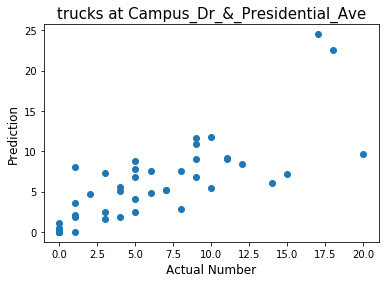

R2= 0.001110505753061708


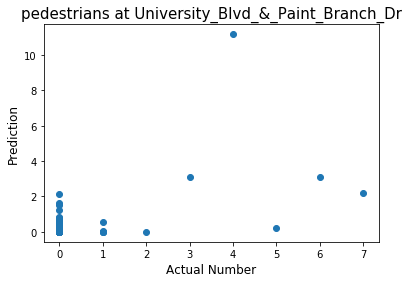

R2= 0.45475718177791846


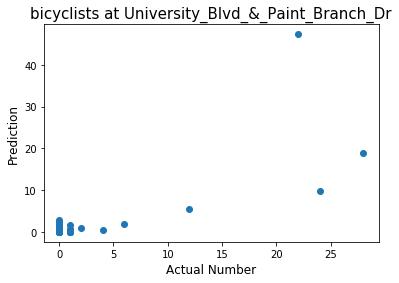

R2= 0.8901017424075943


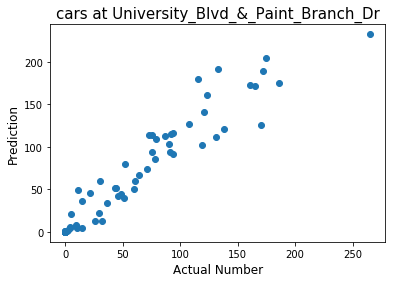

R2= 0.3785738253711194


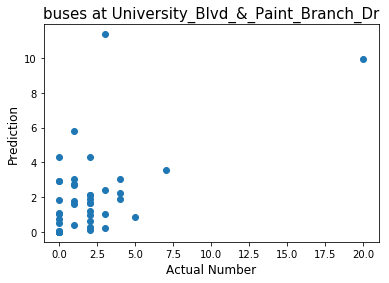

R2= 0.8033469073226794


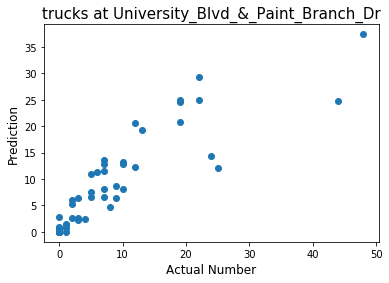

R2= 0.5358061473348616


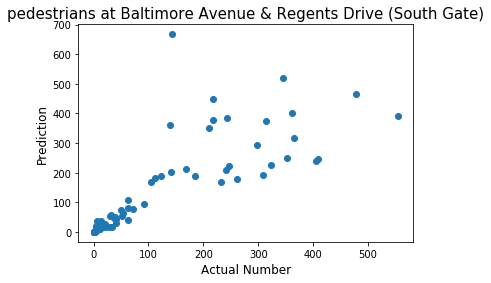

R2= -0.12224930272057666


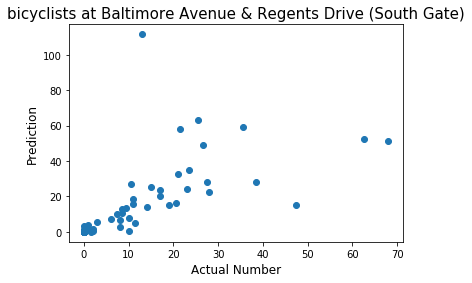

R2= 0.9589576963365255


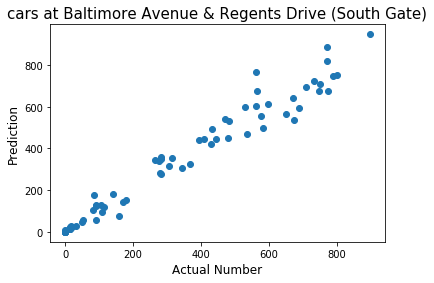

R2= 0.5006078298669732


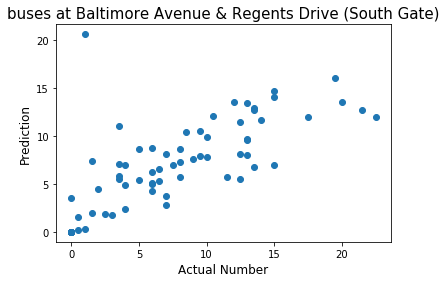

R2= 0.837856684025113


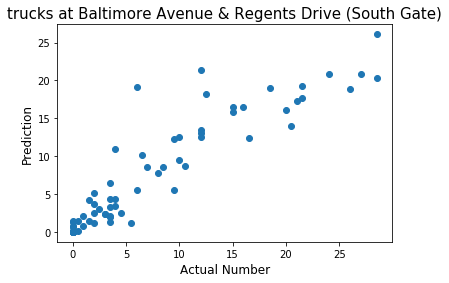

R2= 0.42689463913027004


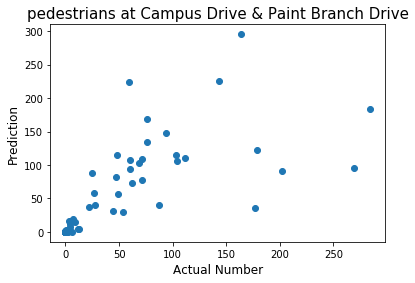

R2= 0.13112780917487066


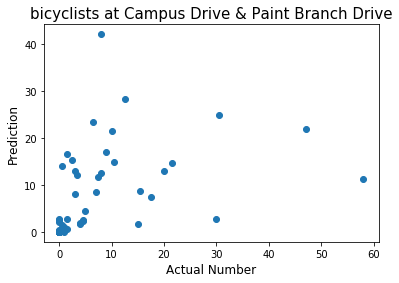

R2= 0.8711726461914955


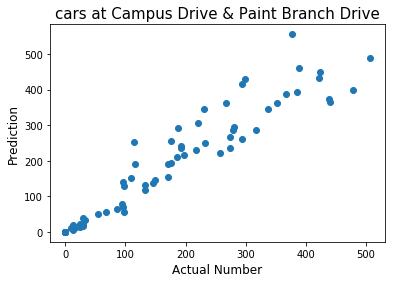

R2= 0.8013493062025809


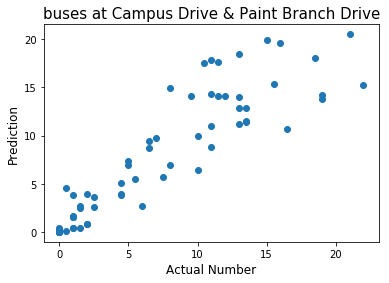

R2= 0.7347716782800567


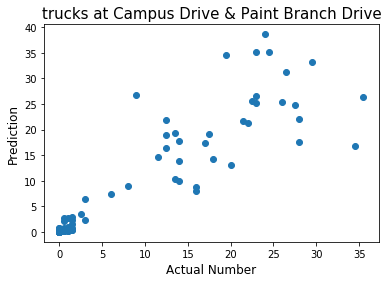

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


Dots_mod['FB_start']=Dots_mod['Date'].apply(lambda x: 12 if x=='2019-11-02' else -1)
Dots_mod['FB_end']=Dots_mod['Date'].apply(lambda x: 15 if x=='2019-11-02' else -1)
Dots_mod['BK_start']=Dots_mod['Date'].apply(lambda x: 19.5 if x=='2019-11-01' or x=='2019-11-05' else (21 if x=='2019-11-9' else -1))
Dots_mod['BK_end']=Dots_mod['Date'].apply(lambda x: 22.5 if x=='2019-11-01' or x=='2019-11-05' else (24 if x=='2019-11-9' else -1))
Dots_mod['hour']=Dots_mod['StartTime'].apply(lambda x: (int(x.hour)+float(x.minute/60)))
Dots_mod['temp']=Dots_mod['Date'].apply(lambda x: temperature(x))
Dots_mod['is_weekend']=Dots_mod['weekday'].apply(lambda x: 1 if x==6 or x==7 else -1)
Dots_mod['is_gameday']=Dots_mod['Date'].apply(lambda x: 1 if x=='2019-11-02' else -1)
Dots_mod['class_peak']=Dots_mod[['hour','weekday']].apply(class_peaks,axis=1)
xx= np.linspace(0, 100, 100)


train_idx_list=[]
test_idx_list=[]
test_x=[]
test_y=[]
pred_y=[]
x_whole=[]
y_whole=[]
Dots_pre1=[]

Dots_list=[]
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Stadium Drive & Regents Drive'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Campus_Dr_&_Presidential_Ave'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='University_Blvd_&_Paint_Branch_Dr'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Baltimore Avenue & Regents Drive (South Gate)'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Campus Drive & Paint Branch Drive'])

locs=['Stadium Drive & Regents Drive','Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
                 'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']
types=['pedestrians','bicyclists','cars','buses','trucks']

for i in range(5):
    df=Dots_list[i]
    #x=df[["hour","weekday","FB_start","FB_end","BK_start","BK_end","temp",'is_weekend','is_gameday','class_peak']]
    #x_whole.append(x)
    #y=df[['pedestrians','bicyclists','cars']]
    #y_whole.append(y)
    idx=range(df.shape[0])
    train_idx,test_idx=train_test_split(idx,test_size=0.05,random_state=0)
    train_idx_list.append(train_idx)
    test_idx_list.append(test_idx)
    

#analysis about the time and temperature use normalized data
for i in range(5):
    df=Dots_list[i]
    train_1=df.iloc[train_idx_list[i],:]
    train_1=train_1[train_1["is_gameday"]==-1]
    train_1=rounded_time(train_1)
    train_x=train_1[["center_time","weekday"]]
    train_y=train_1[['pedestrians','bicyclists','cars','buses','trucks']]
    cols_to_norm = ['pedestrians','bicyclists','cars','buses','trucks']
    train_y_norm=train_y[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    regr1=RandomForestRegressor()
    regr1.fit(train_x, train_y_norm)
    test_1=df.iloc[test_idx_list[i],:]
    test_1=test_1[test_1["is_gameday"]==-1]
    test_1_x=test_1[["hour","weekday"]]
    test_1_y=regr1.predict(test_1_x)
    
    true_y=test_1[['pedestrians','bicyclists','cars','buses','trucks']]
    true_y_norm=true_y[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    ## model 2 considering the temperature&class schedule&basketball
    tran_temp=df.iloc[train_idx_list[i],:]
    train_temp=tran_temp[tran_temp["is_gameday"]==-1]
    train_temp_x=train_temp[["hour","weekday",'temp','class_peak','BK_start','BK_end']]
    train_y_temp=train_temp[['pedestrians','bicyclists','cars','buses','trucks']]
    train_y_temp_norm_1=regr1.predict(train_temp_x[["hour","weekday"]])+0.001
    train_y_temp_2=train_y_temp/train_y_temp_norm_1
    regr2=RandomForestRegressor()
    regr2.fit(train_temp_x, train_y_temp_2)
    test_2_x=test_1[["hour","weekday",'temp','class_peak','BK_start','BK_end']]
    test_2_y=regr2.predict(test_2_x)
    test_y=test_2_y*test_1_y
    
    ## model3 considering the game day:
    train_3=df.iloc[train_idx_list[i],:]
    train_3=train_3[train_3["is_gameday"]==1]
    test_3=df.iloc[test_idx_list[i],:]
    test_3=test_3[test_3["is_gameday"]==1]
    if test_3.shape[0]!=0:
        train_3_x=train_3[["is_gameday","hour","weekday",'FB_start','FB_end']]
        train_3_y=train_3[['pedestrians','bicyclists','cars','buses','trucks']]
        test_3_x=test_3[["is_gameday","hour","weekday",'FB_start','FB_end']]
        test_3_y=test_3[['pedestrians','bicyclists','cars','buses','trucks']]
        regr3=DecisionTreeRegressor()
        regr3.fit(train_3_x, train_3_y)
        test_3_y=regr3.predict(test_3_x)
        test_y.append(test_3_y)
        
    
    for j in range(5):
        acc=r2_score(true_y[types[j]], test_y[:,j])
        print ("R2= "+str(acc))
        fig = plt.figure()
        ax = plt.subplot(111)
        plt.scatter(true_y[types[j]],test_y[:,j])
        plt.xlabel('Actual Number', fontsize =12)
        plt.ylabel('Prediction',fontsize =12)
        plt.title(types[j] + ' at '+locs[i], color = "k",fontsize =15)
        plt.show()
    
    




R2=0.6057380525585216


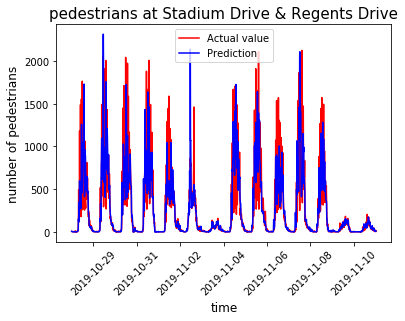

R2=0.7643649341858061


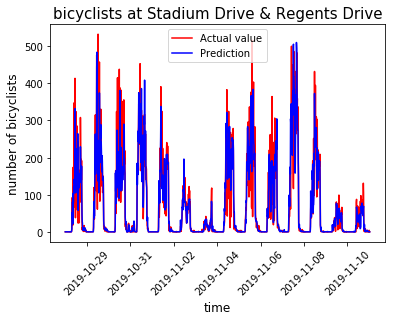

R2=0.9342490065832725


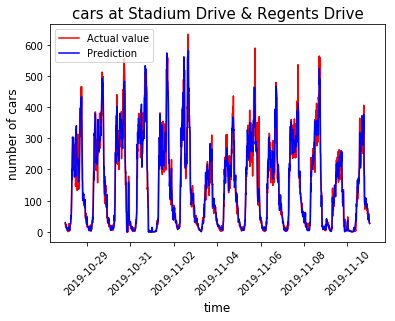

R2=-0.4473345326668223


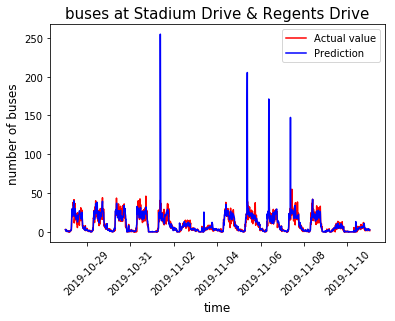

R2=0.8902318484028406


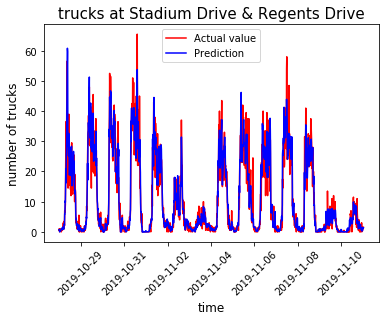

R2=0.6331501035709585


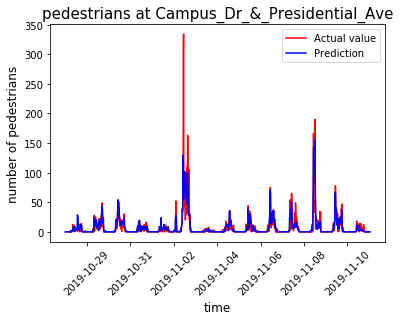

R2=-10.022090534882407


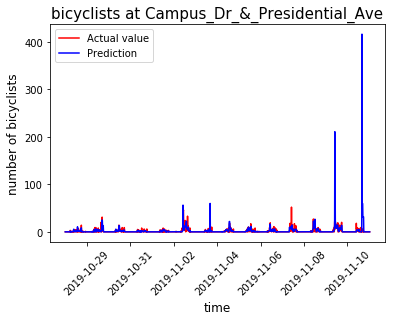

R2=0.9185292684350292


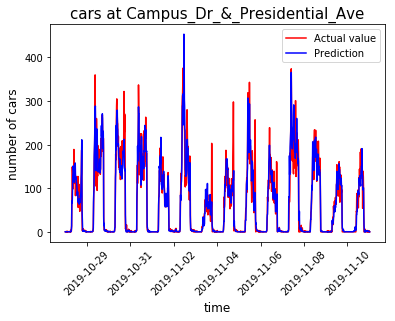

R2=0.6754978335985683


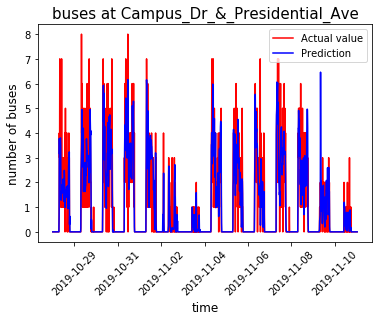

R2=0.7482133236927281


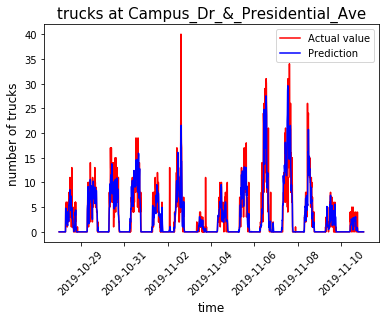

R2=0.5022821929103773


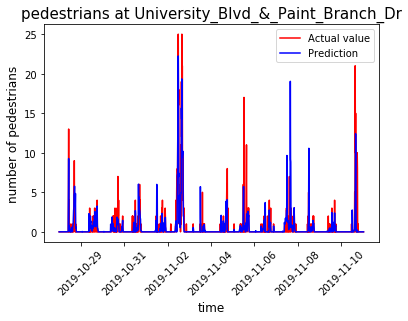

R2=-3.0461890575863535


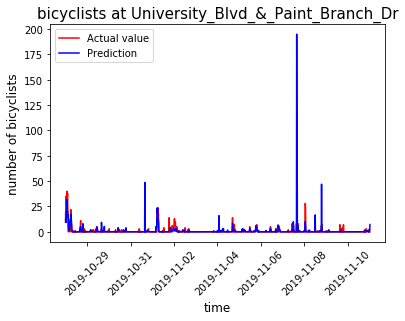

R2=0.9050052327433645


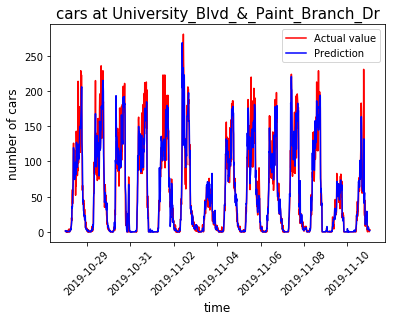

R2=0.7252300878464562


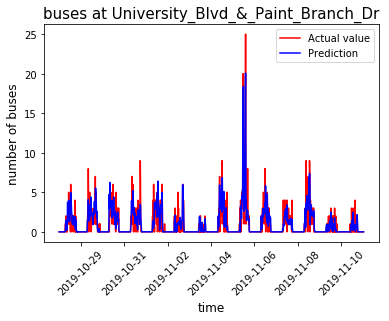

R2=0.8564080320732264


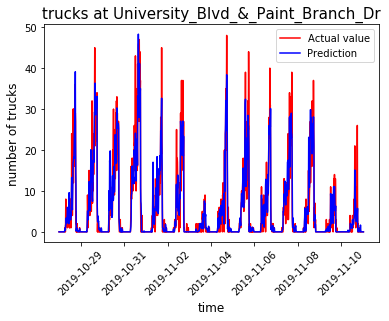

R2=0.8129300076515633


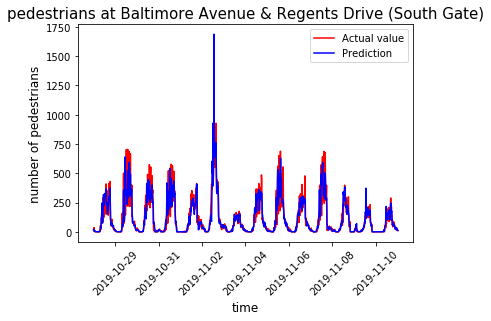

R2=0.7383054643009866


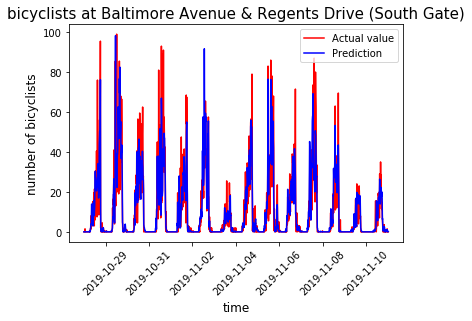

R2=0.964802772445119


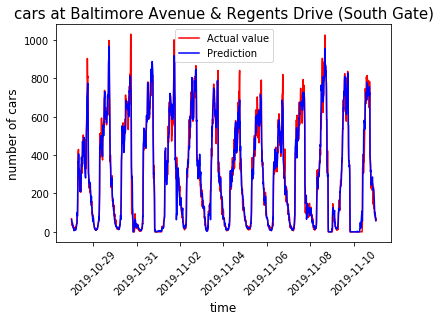

R2=0.7678099132044486


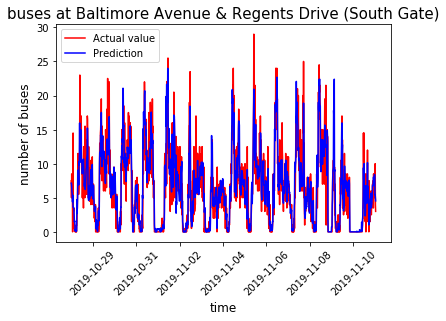

R2=0.81165840929893


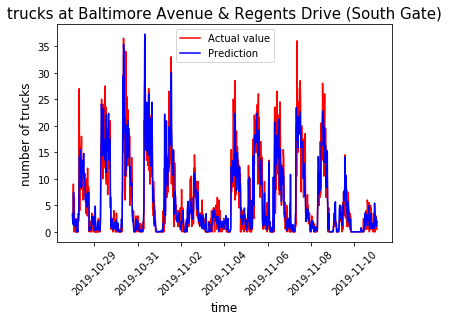

R2=0.3905981228971177


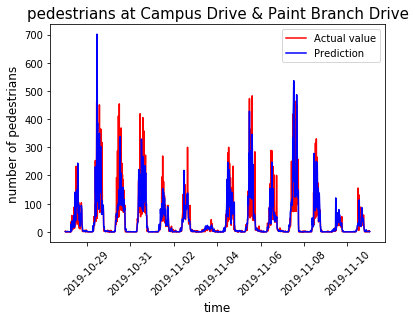

R2=0.21570446871934312


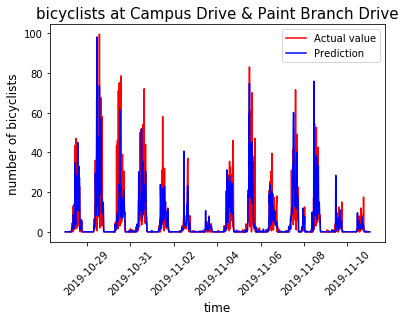

R2=0.9175127112313034


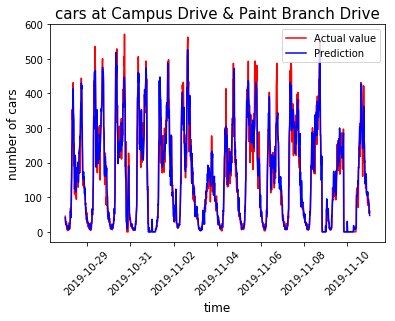

R2=0.8779232108325704


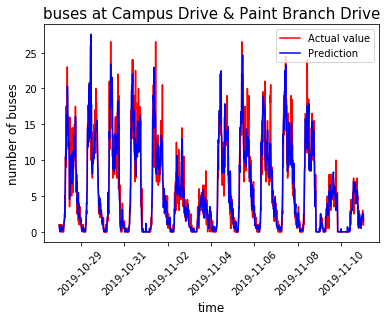

R2=0.829561196448987


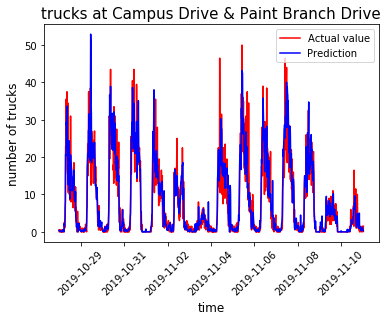

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


Dots_mod['FB_start']=Dots_mod['Date'].apply(lambda x: 12 if x=='2019-11-02' else -1)
Dots_mod['FB_end']=Dots_mod['Date'].apply(lambda x: 15 if x=='2019-11-02' else -1)
Dots_mod['BK_start']=Dots_mod['Date'].apply(lambda x: 19.5 if x=='2019-11-01' or x=='2019-11-05' else (21 if x=='2019-11-9' else -1))
Dots_mod['BK_end']=Dots_mod['Date'].apply(lambda x: 22.5 if x=='2019-11-01' or x=='2019-11-05' else (24 if x=='2019-11-9' else -1))
Dots_mod['hour']=Dots_mod['StartTime'].apply(lambda x: (int(x.hour)+float(x.minute/60)))
Dots_mod['temp']=Dots_mod['Date'].apply(lambda x: temperature(x))
Dots_mod['is_weekend']=Dots_mod['weekday'].apply(lambda x: 1 if x==6 or x==7 else -1)
Dots_mod['is_gameday']=Dots_mod['Date'].apply(lambda x: 1 if x=='2019-11-02' else -1)
Dots_mod['class_peak']=Dots_mod[['hour','weekday']].apply(class_peaks,axis=1)
xx= np.linspace(0, 100, 100)


train_idx_list=[]
test_idx_list=[]
test_x=[]
test_y=[]
pred_y=[]
x_whole=[]
y_whole=[]
Dots_pre1=[]

Dots_list=[]
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Stadium Drive & Regents Drive'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Campus_Dr_&_Presidential_Ave'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='University_Blvd_&_Paint_Branch_Dr'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Baltimore Avenue & Regents Drive (South Gate)'])
Dots_list.append(Dots_mod[Dots_mod["location_5"]=='Campus Drive & Paint Branch Drive'])

locs=['Stadium Drive & Regents Drive','Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
                 'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']
types=['pedestrians','bicyclists','cars','buses','trucks']

for i in range(5):
    df=Dots_list[i]
    #x=df[["hour","weekday","FB_start","FB_end","BK_start","BK_end","temp",'is_weekend','is_gameday','class_peak']]
    #x_whole.append(x)
    #y=df[['pedestrians','bicyclists','cars']]
    #y_whole.append(y)
    idx=range(df.shape[0])
    train_idx,test_idx=train_test_split(idx,test_size=0.5,random_state=0)
    train_idx_list.append(train_idx)
    test_idx_list.append(idx)
    

#analysis about the time and temperature use normalized data
for i in range(5):
    df=Dots_list[i]
    x=df.time
    train_1=df.iloc[train_idx_list[i],:]
    train_1=train_1[train_1["is_gameday"]==-1]
    train_1=rounded_time(train_1)
    train_x=train_1[["center_time","weekday"]]
    train_y=train_1[['pedestrians','bicyclists','cars','buses','trucks']]
    cols_to_norm = ['pedestrians','bicyclists','cars','buses','trucks']
    train_y_norm=train_y[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    regr1=RandomForestRegressor()
    regr1.fit(train_x, train_y_norm)
    test_1=df.iloc[test_idx_list[i],:]
    test_1=test_1[test_1["is_gameday"]==-1]
    test_1_x=test_1[["hour","weekday"]]
    test_1_y=regr1.predict(test_1_x)
    
    true_y=df.iloc[test_idx_list[i],:][['pedestrians','bicyclists','cars','buses','trucks']]
    true_y_norm=true_y[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    ## model 2 considering the temperature&class schedule&basketball
    tran_temp=df.iloc[train_idx_list[i],:]
    train_temp=tran_temp[tran_temp["is_gameday"]==-1]
    train_temp_x=train_temp[["hour","weekday",'temp','class_peak','BK_start','BK_end']]
    train_y_temp=train_temp[['pedestrians','bicyclists','cars','buses','trucks']]
    train_y_temp_norm_1=regr1.predict(train_temp_x[["hour","weekday"]])+0.001
    train_y_temp_2=train_y_temp/train_y_temp_norm_1
    regr2=RandomForestRegressor()
    regr2.fit(train_temp_x, train_y_temp_2)
    test_2_x=test_1[["hour","weekday",'temp','class_peak','BK_start','BK_end']]
    test_2_y=regr2.predict(test_2_x)
    test_y=test_2_y*test_1_y
    
    ## model3 considering the game day:
    train_3=df.iloc[train_idx_list[i],:]
    train_3=train_3[train_3["is_gameday"]==1]
    test_3=df.iloc[test_idx_list[i],:]
    test_3=test_3[test_3["is_gameday"]==1]
    if test_3.shape[0]!=0:
        train_3_x=train_3[["is_gameday","hour","weekday",'FB_start','FB_end']]
        train_3_y=train_3[['pedestrians','bicyclists','cars','buses','trucks']]
        test_3_x=test_3[["is_gameday","hour","weekday",'FB_start','FB_end']]
        test_3_y=test_3[['pedestrians','bicyclists','cars','buses','trucks']]
        regr3=DecisionTreeRegressor()
        regr3.fit(train_3_x, train_3_y)
        test_3_y=regr3.predict(test_3_x)
        test_y.append(test_3_y)
        
        
    
    for j in range(5):
        
        
        acc=r2_score(true_y[types[j]], test_y[:,j])
        print ("R2="+ str(acc))
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, true_y[types[j]], label='Actual value',color='r')
        ax.plot(x, test_y[:,j], label='Prediction',color='b')
        ax.legend()
        plt.xlabel('time', fontsize =12)
        plt.xticks(rotation=45)
        plt.ylabel('number of '+ types[j],fontsize =12)
        plt.title(types[j] + ' at '+locs[i], color = "k",fontsize =15)
        plt.show()